Importing various libraries

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing the dataset

In [90]:
cricket_data = pd.read_csv('SuperCleaned.csv', low_memory=False)



Generic cleaning/ scrubbing/ sorting of the dataset - with a view of understanding the data better

In [91]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(cricket_data.head())

First 5 rows of the dataset:
   Unnamed: 0      ID              NAME  COUNTRY  \
0           0    8772      Henry Arkell  England   
1           1  532565     Richard Nyren  England   
2           2   16856  Sydney Maartensz  England   
3           3   16715      Brian Lander  England   
4           4   15989  Derek Kenderdine  England   

                        Full name   Birthdate                  Birthplace  \
0        Henry John Denham Arkell  1898-06-26         Edmonton, Middlesex   
1                   Richard Nyren  1734-04-25             Eartham, Sussex   
2  Sydney Gratien Adair Maartensz  1882-04-14             Colombo, Ceylon   
3            Brian Richard Lander    09/01/42  Bishop Auckland, Co Durham   
4        Derek Charles Kenderdine  1897-10-28           Chislehurst, Kent   

    Died Date_of_death   Age  ... BOWLING_T20s_Runs BOWLING_T20s_Wkts  \
0   Dead      12/03/82  84.0  ...               NaN               NaN   
1   Dead    1797-04-25  63.0  ...               N

In [92]:
# Display column names
print("\nColumn names:")
print(cricket_data.columns)



Column names:
Index(['Unnamed: 0', 'ID', 'NAME', 'COUNTRY', 'Full name', 'Birthdate',
       'Birthplace', 'Died', 'Date_of_death', 'Age',
       ...
       'BOWLING_T20s_Runs', 'BOWLING_T20s_Wkts', 'BOWLING_T20s_BBI',
       'BOWLING_T20s_BBM', 'BOWLING_T20s_Ave', 'BOWLING_T20s_Econ',
       'BOWLING_T20s_SR', 'BOWLING_T20s_4w', 'BOWLING_T20s_5w',
       'BOWLING_T20s_10'],
      dtype='object', length=177)


In [93]:
# Display data types of columns
print("\nData types:")
print(cricket_data.dtypes)


Data types:
Unnamed: 0             int64
ID                     int64
NAME                  object
COUNTRY               object
Full name             object
                      ...   
BOWLING_T20s_Econ    float64
BOWLING_T20s_SR      float64
BOWLING_T20s_4w      float64
BOWLING_T20s_5w      float64
BOWLING_T20s_10      float64
Length: 177, dtype: object


To view Summary statistics

In [94]:
# Summary statistics
print("\nSummary statistics:")
print(cricket_data.describe())


Summary statistics:


         Unnamed: 0            ID           Age  BATTING_Tests_Mat  \
count  90308.000000  9.030800e+04  64671.000000        3652.000000   
mean   45153.500000  3.463182e+05     47.592383          15.000000   
std    26069.818392  3.974984e+05     21.750813          23.069388   
min        0.000000  3.931000e+03    -51.000000           1.000000   
25%    22576.750000  2.851175e+04     29.000000           2.000000   
50%    45153.500000  5.336650e+04     42.000000           6.000000   
75%    67730.250000  5.960022e+05     65.000000          17.000000   
max    90307.000000  1.178645e+06    254.000000         200.000000   

       BATTING_Tests_Inns  BATTING_Tests_NO  BATTING_Tests_Runs  \
count         3605.000000       3605.000000         3605.000000   
mean            24.399168          3.188904          635.452982   
std             37.746683          5.741141         1428.712495   
min              1.000000          0.000000            0.000000   
25%              4.000000         

To check for missing values

In [95]:
# Check for missing values
print("\nNumber of missing values in each column:")
print(cricket_data.isnull().sum())



Number of missing values in each column:
Unnamed: 0               0
ID                       0
NAME                     2
COUNTRY                  0
Full name                2
                     ...  
BOWLING_T20s_Econ    85259
BOWLING_T20s_SR      86060
BOWLING_T20s_4w      85258
BOWLING_T20s_5w      85258
BOWLING_T20s_10      85258
Length: 177, dtype: int64


In [96]:
# Check for duplicate records
print("\nNumber of duplicate records:")
print(cricket_data.duplicated().sum())


Number of duplicate records:
0


A basic visualization - All Batting Averages

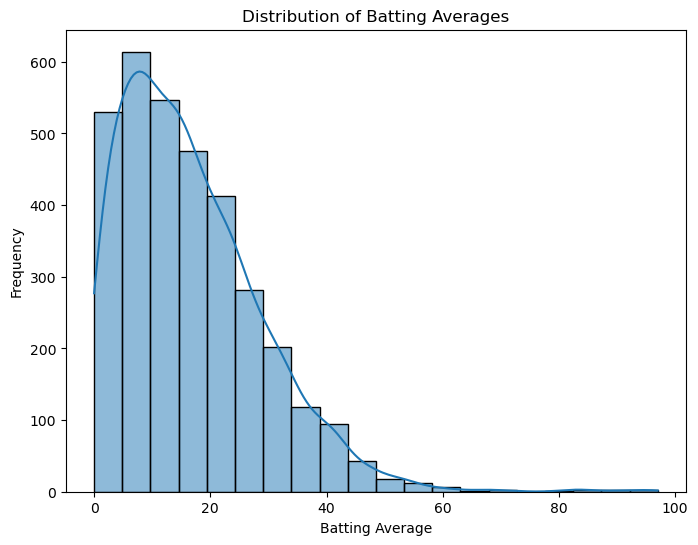

In [97]:
# Histogram of batting averages
plt.figure(figsize=(8, 6))
sns.histplot(cricket_data['BATTING_ODIs_Ave'], bins=20, kde=True)
plt.title('Distribution of Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()


Top 80 Batsmen - based on batting average

In [98]:
# Top 80 batsmen based on batting average
top_batsmen = cricket_data.sort_values(by='BATTING_ODIs_Ave', ascending=False).head(80)
print("\nTop 80 Batsmen based on Batting Average:")
print(top_batsmen[['NAME', 'BATTING_ODIs_Ave']])



Top 80 Batsmen based on Batting Average:
                        NAME  BATTING_ODIs_Ave
20775       Arvind Kandappah             97.00
41841            Aamer Yamin             95.00
24929           Fiona Fraser             94.00
72166           Trish Dawson             91.00
86863  Rassie van der Dussen             88.25
...                      ...               ...
79415        Quinton de Kock             45.56
88748              Shai Hope             45.56
88524       Gordon Greenidge             45.03
20863         Raza-ur-Rehman             45.00
39782       Sachin Tendulkar             44.83

[80 rows x 2 columns]


In [99]:
# Exclude non-numeric columns from the correlation analysis
numeric_columns = cricket_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                    Unnamed: 0        ID       Age  BATTING_Tests_Mat  \
Unnamed: 0            1.000000 -0.219163  0.154874           0.040754   
ID                   -0.219163  1.000000 -0.656215          -0.083569   
Age                   0.154874 -0.656215  1.000000          -0.054015   
BATTING_Tests_Mat     0.040754 -0.083569 -0.054015           1.000000   
BATTING_Tests_Inns    0.034237 -0.076948 -0.059013           0.990416   
...                        ...       ...       ...                ...   
BOWLING_T20s_Econ    -0.016486  0.080452 -0.060396          -0.022025   
BOWLING_T20s_SR      -0.001648  0.051698 -0.032935           0.036848   
BOWLING_T20s_4w       0.059243 -0.137356  0.064307           0.005676   
BOWLING_T20s_5w       0.013512 -0.087946  0.028614           0.023910   
BOWLING_T20s_10            NaN       NaN       NaN                NaN   

                    BATTING_Tests_Inns  BATTING_Tests_NO  BATTING_Tests_Runs  \
Unnamed: 0            

Top 10 run scorers in ODI history

In [100]:
# Top 10 runs scorers in ODIs
player_group = cricket_data.groupby('NAME')

# Aggregate the total runs scored by each player
total_runs_scored = player_group['BATTING_ODIs_Runs'].sum()

# Sort the players based on total runs scored
top_10_run_scorers = total_runs_scored.sort_values(ascending=False).head(10)

# Display the top 10 run scorers
print("Top 10 Run Scorers in Cricket:")
print(top_10_run_scorers)


Top 10 Run Scorers in Cricket:
NAME
Sachin Tendulkar      18426.0
Kumar Sangakkara      14234.0
Ricky Ponting         13704.0
Sanath Jayasuriya     13430.0
Mahela Jayawardene    12650.0
Inzamam-ul-Haq        11739.0
Jacques Kallis        11579.0
Sourav Ganguly        11363.0
Rahul Dravid          10889.0
Virat Kohli           10843.0
Name: BATTING_ODIs_Runs, dtype: float64


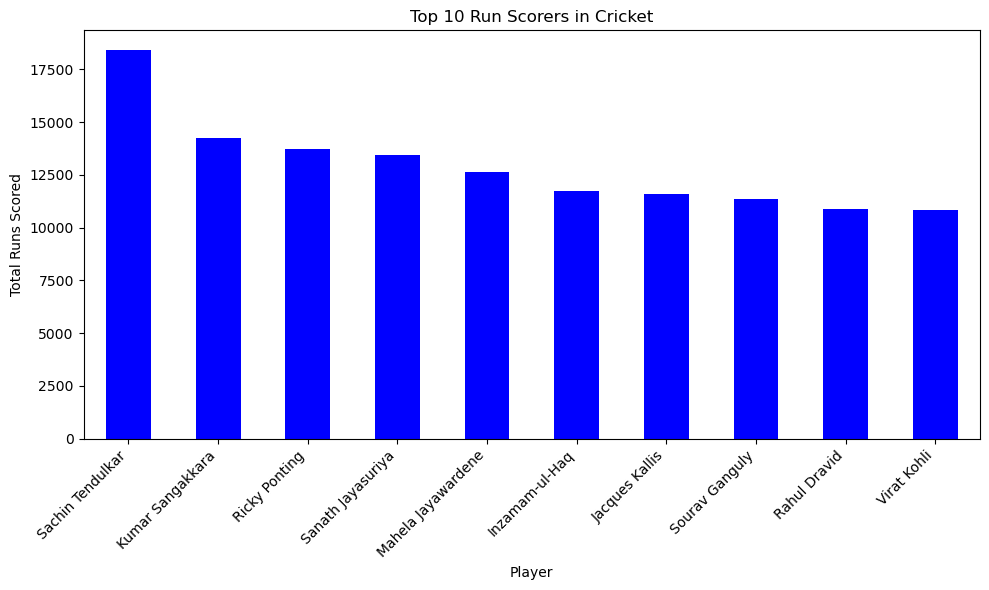

In [101]:
# Top 10 run scorers in ODIs
top_10_run_scorers = total_runs_scored.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_run_scorers.plot(kind='bar', color='blue')
plt.title('Top 10 Run Scorers in Cricket')
plt.xlabel('Player')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


To prove that Sachin Tendulkar has the highest batting average among players with 350 or more ODIs

In [102]:
# Filter players who have played 350 or more ODIs
filtered_data = data[data['BATTING_ODIs_Mat'] >= 350]

# Calculate batting average for each player
batting_average = filtered_data.groupby('NAME')['BATTING_ODIs_Ave'].mean()


In [103]:
# Compare Sachin's batting average with others
sachin_average = batting_average['Sachin Tendulkar']
highest_average = batting_average.max()

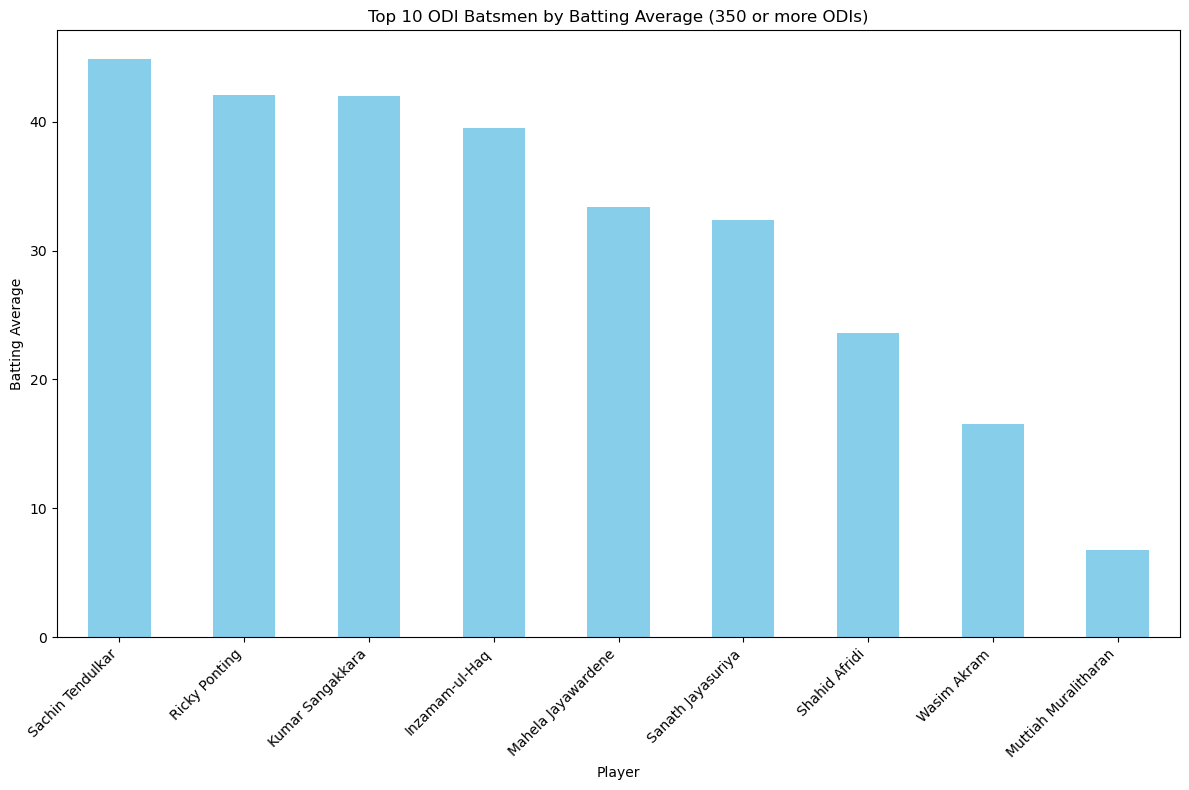

In [104]:
# Sort players by batting average
batting_average = batting_average.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
batting_average.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 ODI Batsmen by Batting Average (350 or more ODIs)')
plt.xlabel('Player')
plt.ylabel('Batting Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Most Centuries in ODIs

In [128]:
# Group the data by player and count the number of centuries
centuries_count = data.groupby('NAME')['BATTING_ODIs_100'].sum()

most_centuries_player = centuries_count.idxmax()
most_centuries = centuries_count.max()


In [109]:
# Group the data by player and count the number of centuries
centuries_count = data.groupby('NAME')['BATTING_ODIs_100'].sum()

# Sort the players by the number of centuries and select the top 10
top_10_centuries = centuries_count.nlargest(10)

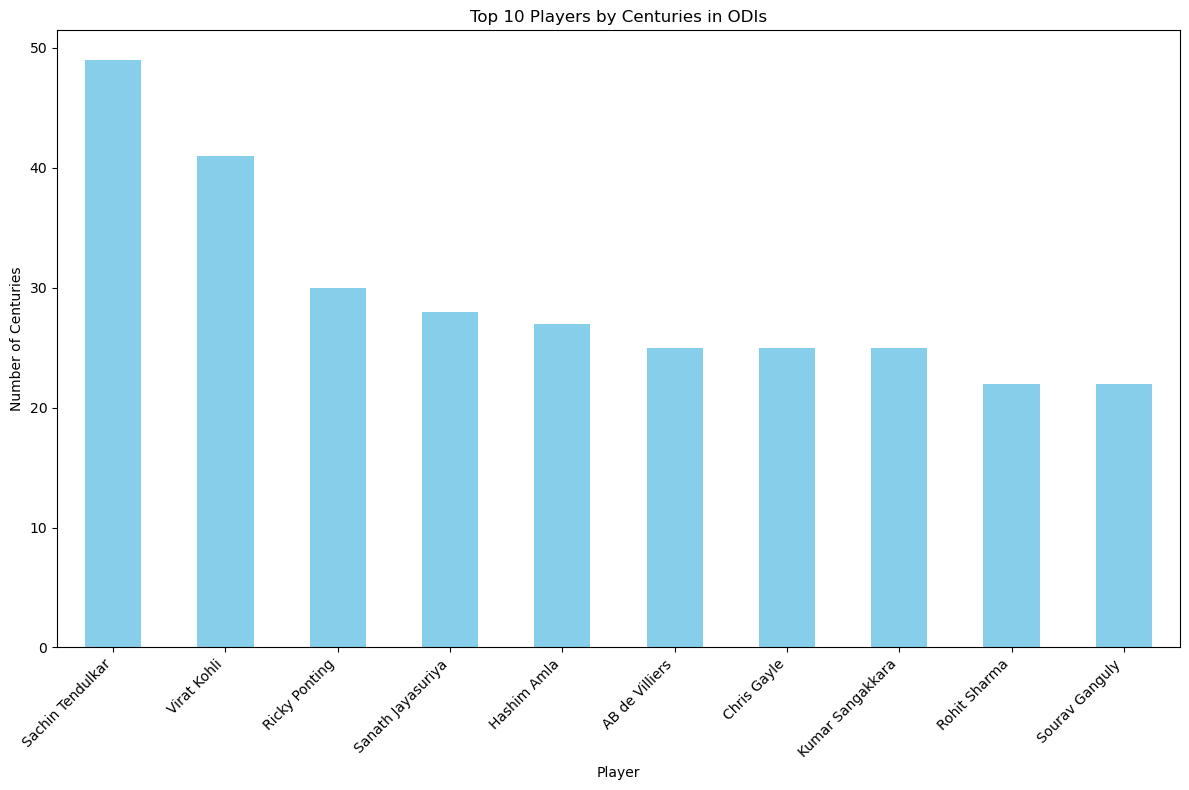

In [131]:
# Plotting
plt.figure(figsize=(12, 8))
top_10_centuries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Players by Centuries in ODIs')
plt.xlabel('Player')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Most 50s in ODIs

In [127]:
# Group the data by player and count the number of 50s
fifties_count = data.groupby('NAME')['BATTING_ODIs_50'].sum()

most_50s_player = fifties_count.idxmax()
most_fifties = fifties_count.max()

In [136]:
top_10_Fiftys = fifties_count.nlargest(10)

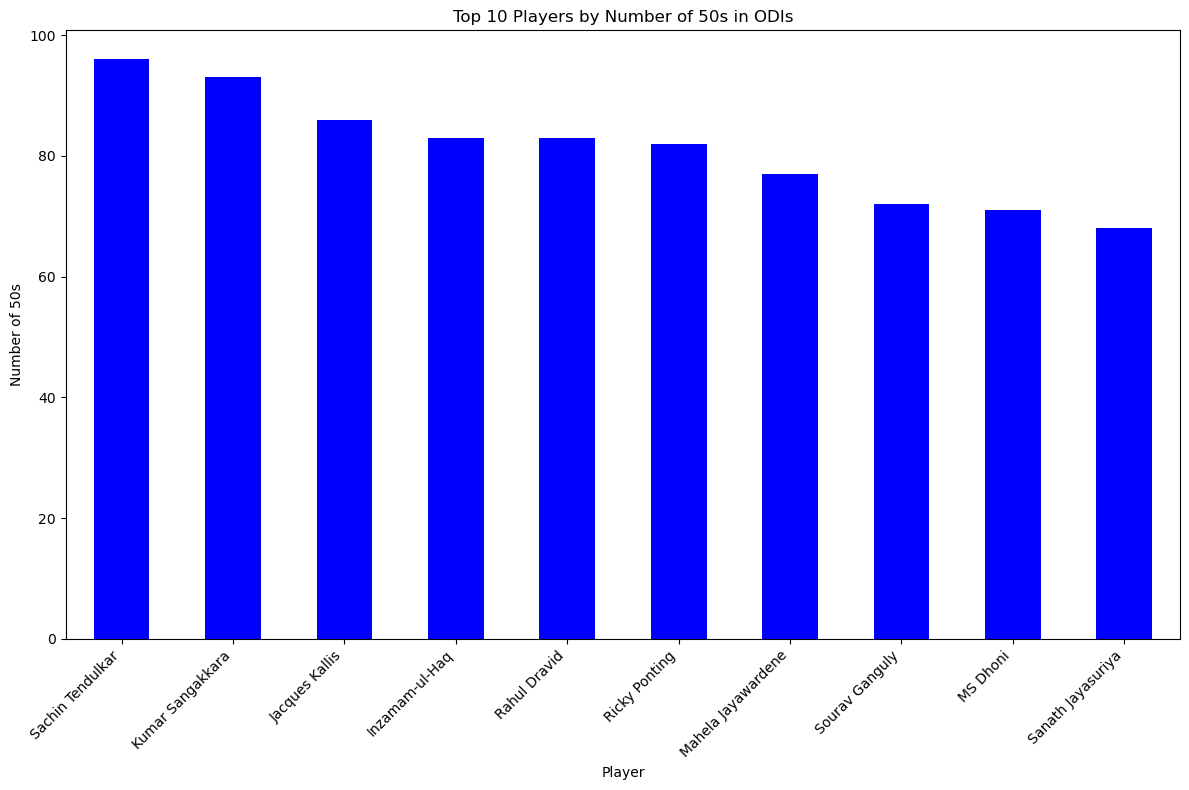

In [137]:
# Plotting
plt.figure(figsize=(12, 8))
top_10_Fiftys.plot(kind='bar', color='blue')
plt.title('Top 10 Players by Number of 50s in ODIs')
plt.xlabel('Player')
plt.ylabel('Number of 50s')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Highest wicket takers among players who scored more than 10,000 runs

In [122]:
# Filter players who scored more than 10000 runs
players_above_10000_runs = data[data['BATTING_ODIs_Runs'] > 10000]

# Filter out players with 0 wickets
players_above_10000_runs_and_wickets = players_above_10000_runs[players_above_10000_runs['BOWLING_ODIs_Wkts'] > 0]

# Sort the filtered players by wickets taken and select the top 10
top_10_wicket_takers = players_above_10000_runs_and_wickets.nlargest(10, 'BOWLING_ODIs_Wkts')

# Display the top 10 wicket-takers
print("Top 10 Wicket-Takers among Players with more than 10000 Runs:")
print(top_10_wicket_takers[['NAME', 'BOWLING_ODIs_Wkts']])


Top 10 Wicket-Takers among Players with more than 10000 Runs:
                       NAME  BOWLING_ODIs_Wkts
49523     Sanath Jayasuriya              323.0
82753        Jacques Kallis              273.0
88670           Chris Gayle              165.0
39782      Sachin Tendulkar              154.0
47753  Tillakaratne Dilshan              106.0
31468        Sourav Ganguly              100.0
49486    Mahela Jayawardene                8.0
29523          Rahul Dravid                4.0
32291           Virat Kohli                4.0
89287            Brian Lara                4.0


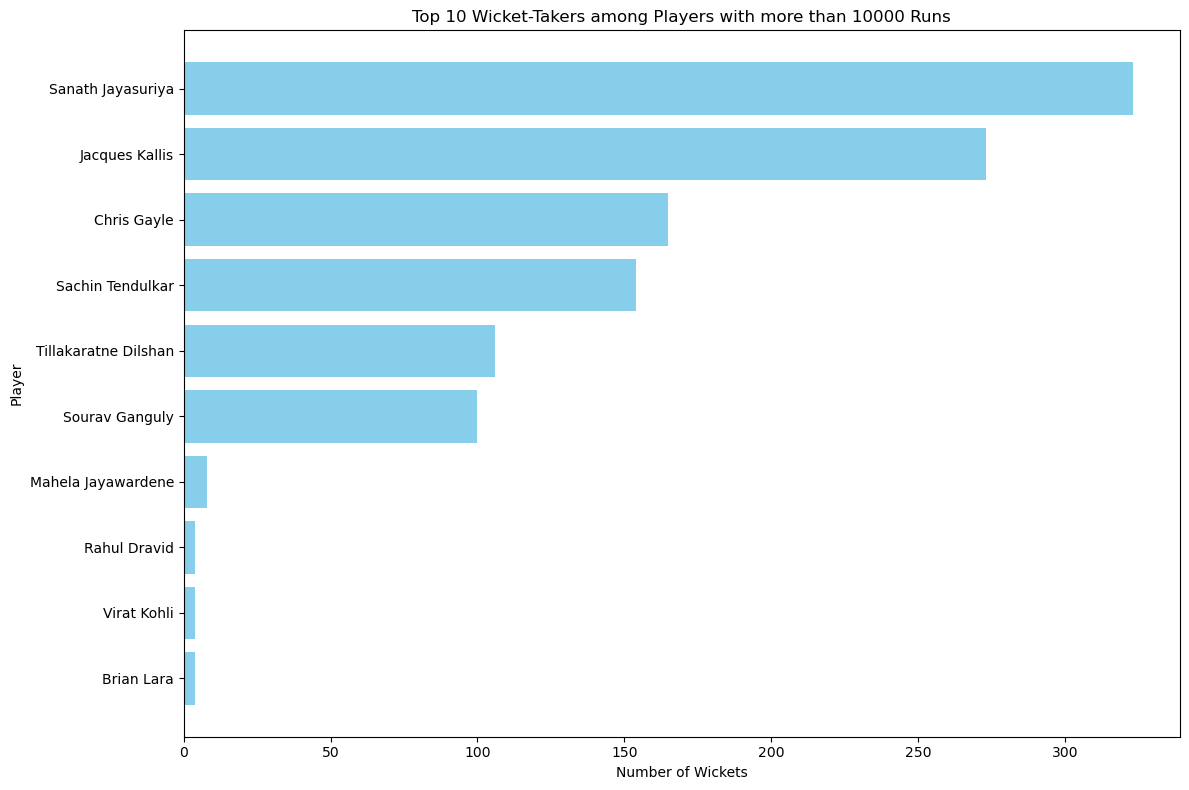

In [124]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_10_wicket_takers['NAME'], top_10_wicket_takers['BOWLING_ODIs_Wkts'], color='skyblue')
plt.title('Top 10 Wicket-Takers among Players with more than 10000 Runs')
plt.xlabel('Number of Wickets')
plt.ylabel('Player')
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the most wickets at the top
plt.tight_layout()
plt.show()

Top 10 Batsmen by Strike Rates

In [156]:
# Filter players who have played more than 100 matches
players_above_350_matches = data[data['BATTING_ODIs_Mat'] > 350]

In [159]:
sorted_players = players_above_350_matches.sort_values(by='BATTING_ODIs_SR', ascending=False)

top_10_strike_rates = sorted_players.head(10)

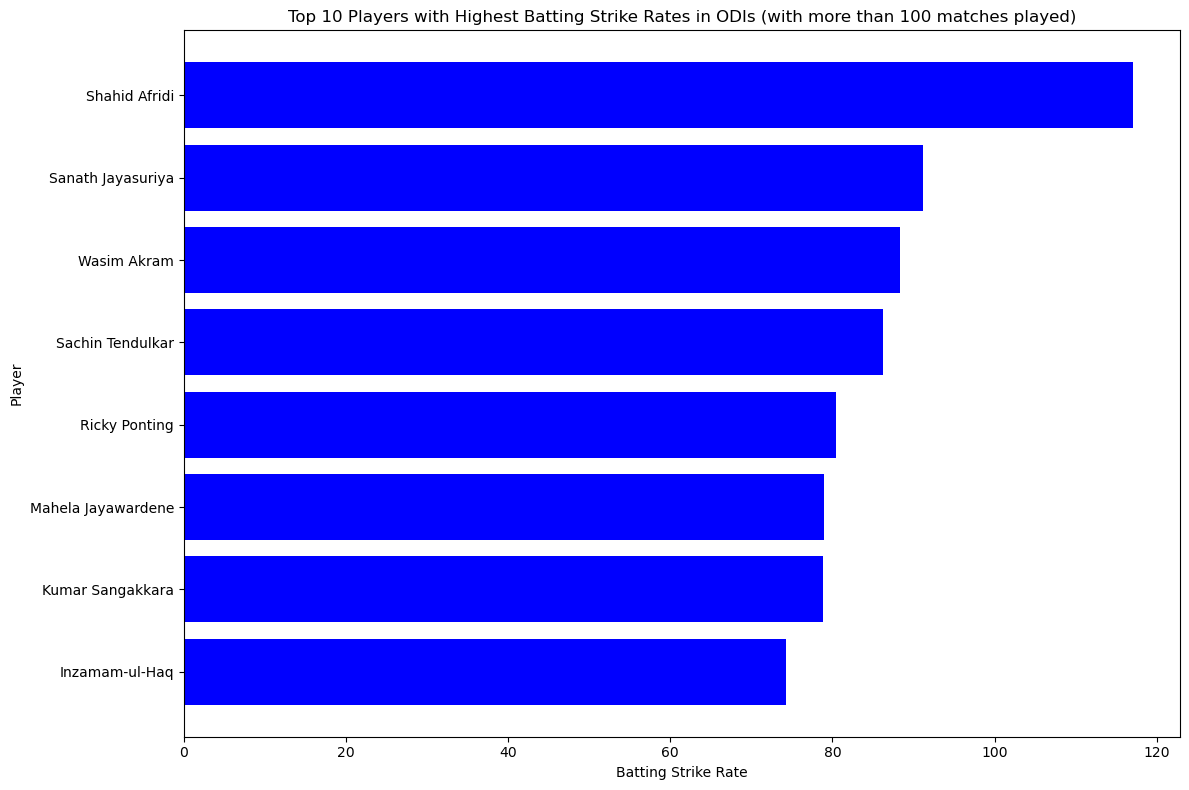

In [160]:
# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_10_strike_rates['NAME'], top_10_strike_rates['BATTING_ODIs_SR'], color='blue')
plt.title('Top 10 Players with Highest Batting Strike Rates in ODIs (with more than 100 matches played)')
plt.xlabel('Batting Strike Rate')
plt.ylabel('Player')
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the highest strike rate at the top
plt.tight_layout()
plt.show()